## Formateo de Resultados

* Fecha: 2022-02-22
* Coder: Lenin G. Falconi
* Obtejivo: Formatear los resultados generados en el modelo 2022 de la EPN para su consumo por parte de procesos

In [111]:
import pandas as pd
import numpy as np
import os
dir_root = os.getcwd()
dir_root

'c:\\Users\\falconiel\\PycharmProjects\\EPN_Fiscales\\Proyecto_Fiscal-a'

Existen dos juegos de resultados localizados en Resultados/Modelo y Resultados/Predicciones


**Resultados Modelo*
Contienen dos hojas de Excel:
* Resumen: Contiene los valores a reportar en el déficit de fiscales. Posiblemente se tiene que corregir la cantidad de fiscales actuales porque seguro se estimo con los valores del distributivo de talento humano que estaban incorrectamente realizados
* Fiscalias: Contiene la distribución o asignación de Fiscales a Fiscalía

In [112]:
os.listdir(os.path.join(dir_root, 'Resultados/Modelo/'))

['Resultados_AZUAY.xlsx',
 'Resultados_BOLIVAR.xlsx',
 'Resultados_CARCHI.xlsx',
 'Resultados_CAÑAR.xlsx',
 'Resultados_CHIMBORAZO.xlsx',
 'Resultados_COTOPAXI.xlsx',
 'Resultados_EL ORO.xlsx',
 'Resultados_ESMERALDAS.xlsx',
 'Resultados_GALAPAGOS.xlsx',
 'Resultados_GUAYAS.xlsx',
 'Resultados_IMBABURA.xlsx',
 'Resultados_LOJA.xlsx',
 'Resultados_LOS RIOS.xlsx',
 'Resultados_MANABI.xlsx',
 'Resultados_MORONA SANTIAGO.xlsx',
 'Resultados_NAPO.xlsx',
 'Resultados_ORELLANA.xlsx',
 'Resultados_PASTAZA.xlsx',
 'Resultados_PICHINCHA.xlsx',
 'Resultados_SANTA ELENA.xlsx',
 'Resultados_SANTO DOMINGO DE LOS TSACHILAS.xlsx',
 'Resultados_SUCUMBIOS.xlsx',
 'Resultados_TUNGURAHUA.xlsx',
 'Resultados_ZAMORA CHINCHIPE.xlsx']

In [113]:
os.listdir(os.path.join(dir_root, 'Resultados/Prediccion/'))

['AZUAY.xlsx',
 'BOLIVAR.xlsx',
 'CARCHI.xlsx',
 'CAÑAR.xlsx',
 'CHIMBORAZO.xlsx',
 'COTOPAXI.xlsx',
 'EL ORO.xlsx',
 'ESMERALDAS.xlsx',
 'GALAPAGOS.xlsx',
 'GUAYAS.xlsx',
 'IMBABURA.xlsx',
 'LOJA.xlsx',
 'LOS RIOS.xlsx',
 'MANABI.xlsx',
 'MORONA SANTIAGO.xlsx',
 'NAPO.xlsx',
 'ORELLANA.xlsx',
 'PASTAZA.xlsx',
 'PICHINCHA.xlsx',
 'SANTA ELENA.xlsx',
 'SANTO DOMINGO DE LOS TSACHILAS.xlsx',
 'SUCUMBIOS.xlsx',
 'TUNGURAHUA.xlsx',
 'ZAMORA CHINCHIPE.xlsx']

## Generación de Tabla de Déficit de Fiscales por Cantón y por Provincia

Para la generación de estos resultados voy a generar una tabla maestra con los datos presentados en la ficha Resumen. Incrementaré el código de Cantón y adicional traeré la cantidad de fiscales leída del archivo que se considera correcto para realizar el cálculo de los déficit

In [114]:
from tqdm import tqdm
import re
regex = r"Resultados\_([\wÁÉÍÓÚ Ñ]+).xlsx"  
deficit_fiscales_dict = {}
for arch in tqdm(os.listdir(os.path.join(dir_root, 'Resultados/Modelo/'))):
    file_path = os.path.join(dir_root, 'Resultados/Modelo/', arch)
    provincia_name = re.findall(regex, arch, re.MULTILINE)[0]
    provincia_df = pd.read_excel(file_path, sheet_name='Resumen')
    provincia_df['Provincia'] = provincia_name
    deficit_fiscales_dict[provincia_name] = provincia_df


100%|██████████| 24/24 [00:00<00:00, 39.22it/s]


In [115]:
deficit_fiscales_dict['CARCHI']

,Cantones,Poblacion,Delitos,Fiscales Actuales,Fiscales x Carga,Déficit x Carga,Tasa Actual,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población,Provincia
0,TULCAN,105198,2445,13,9,-4,12.357649,8.560000,9,-4,8.560000,CARCHI
1,MONTUFAR,35165,711,0,3,3,0.000000,8.531210,3,3,8.531210,CARCHI
2,BOLIVAR,15953,342,1,2,1,6.268413,12.536827,2,1,12.536827,CARCHI
3,ESPEJO,14195,329,0,2,2,0.000000,14.089468,2,2,14.089468,CARCHI
4,MIRA,12297,244,0,1,1,0.000000,8.132065,1,1,8.132065,CARCHI
5,SAN PEDRO DE HUACA,9176,151,0,1,1,0.000000,10.897995,1,1,10.897995,CARCHI


In [116]:
deficit_cantones = pd.concat([deficit_fiscales_dict[x] for x in deficit_fiscales_dict.keys()])
deficit_cantones.reset_index(inplace=True)
deficit_cantones.shape

(221, 13)

Se observa los Cantones que tendrán conflicto al momento de aplicar el diccionario para colocar los codigos de los mismos porque los nombres son repetidos

In [117]:
deficit_cantones[deficit_cantones.duplicated(subset="Cantones", keep=False)]

,index,Cantones,Poblacion,Delitos,Fiscales Actuales,Fiscales x Carga,Déficit x Carga,Tasa Actual,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población,Provincia
24,2,BOLIVAR,15953,342,1,2,1,6.268413,12.536827,2,1,12.536827,CARCHI
121,13,OLMEDO,4336,80,0,0,0,0.000000,0.000000,0,0,0.000000,LOJA
157,20,OLMEDO,10473,207,0,1,1,0.000000,9.548362,1,1,9.548362,MANABI
158,21,BOLIVAR,46738,0,0,4,4,0.000000,8.558347,4,4,8.558347,MANABI


Por esta razon se realizan los siguientes cambios de nombres a fin de poder ubicar de manera univoca los cantones y sus códigos. La suerte es que Olmedo tiene 0 fiscales asignados en ambos casos.... pero Bolivar No

In [118]:
deficit_cantones.Cantones[(deficit_cantones.Provincia=="MANABI")&(deficit_cantones.Cantones=="BOLIVAR")] = "BOLIVAR (CALCETA)"
deficit_cantones.Cantones[(deficit_cantones.Provincia=="LOJA")&(deficit_cantones.Cantones=="OLMEDO")] = "OLMEDO (LOJA)"

C:\Users\FALCON~1\AppData\Local\Temp/ipykernel_27816/3745159939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deficit_cantones.Cantones[(deficit_cantones.Provincia=="MANABI")&(deficit_cantones.Cantones=="BOLIVAR")] = "BOLIVAR (CALCETA)"
C:\Users\FALCON~1\AppData\Local\Temp/ipykernel_27816/3745159939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deficit_cantones.Cantones[(deficit_cantones.Provincia=="LOJA")&(deficit_cantones.Cantones=="OLMEDO")] = "OLMEDO (LOJA)"


In [119]:
deficit_cantones[deficit_cantones.duplicated(subset="Cantones", keep=False)]

,index,Cantones,Poblacion,Delitos,Fiscales Actuales,Fiscales x Carga,Déficit x Carga,Tasa Actual,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población,Provincia


## Extracción del Código de Canton
El diccionario de códigos de canton se obtiene por medio de sql con el siguiente código. No obstante este repo no tiene conexión a las librerías internas por lo que se consulta el archivo csv con la información directamente

    from snippets.utils import conectar_sql
    from sqlalchemy import text
    conn = conectar_sql()
    query = """
    SELECT 
    cantones.can_descripcion as CANTON,
    cantones.can_iso as CODIGO_CANTON
    FROM fiscalia.gen_canton AS cantones;
    """

    codigos_cantones = pd.read_sql(text(query), conn)
    codigos_cantones

In [120]:
codigos_cantones = pd.read_csv(os.path.join(dir_root, 'diccionario_codigoCantones.csv'),
                               converters={'CODIGO_CANTON':str})
codigos_cantones.sample(5)

,CANTON,CODIGO_CANTON
200,SANTA CRUZ,2003
117,OLMEDO (LOJA),1116
83,NARANJAL,0911
13,GUACHAPALA,0114
62,PORTOVELO,0711


In [121]:
codigos_cantones_dict = dict(zip(codigos_cantones.CANTON, codigos_cantones.CODIGO_CANTON))
list(codigos_cantones_dict.items())[:10]

[('CUENCA', '0101'),
 ('GIRON', '0102'),
 ('GUALACEO', '0103'),
 ('NABON', '0104'),
 ('PAUTE', '0105'),
 ('PUCARA', '0106'),
 ('SAN FERNANDO', '0107'),
 ('SANTA ISABEL', '0108'),
 ('SIGSIG', '0109'),
 ('OÑA', '0110')]

In [122]:
len(codigos_cantones_dict.keys())

221

Sustituyendo algunos cantones para que cuadren con las claves del diccionario

In [123]:
deficit_cantones.Cantones[deficit_cantones.Cantones=="ONA"] = "OÑA"
deficit_cantones.Cantones[deficit_cantones.Cantones=="ALFREDO BAQUERIZO MORENO"] = "ALFREDO BAQUERIZO MORENO ( JUJAN )"
deficit_cantones.Cantones[deficit_cantones.Cantones=="ANTONIO ELIZALDE"] = "GENERAL ANTONIO ELIZALDE (BUCAY)"
deficit_cantones.Cantones[deficit_cantones.Cantones=="EMPALME"] = "EL EMPALME"
deficit_cantones.Cantones[deficit_cantones.Cantones=="MARCELINO MARIDUENA"] = "CORONEL MARCELINO MARIDUENA"
deficit_cantones.Cantones[deficit_cantones.Cantones=="BUENA FE"] = "SAN JACINTO DE BUENA FE"
deficit_cantones.Cantones[deficit_cantones.Cantones=="SANTIAGO (MENDEZ) DE PILLARO"] = "SANTIAGO DE PILLARO"

C:\Users\FALCON~1\AppData\Local\Temp/ipykernel_27816/4077159468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deficit_cantones.Cantones[deficit_cantones.Cantones=="ONA"] = "OÑA"
C:\Users\FALCON~1\AppData\Local\Temp/ipykernel_27816/4077159468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deficit_cantones.Cantones[deficit_cantones.Cantones=="ALFREDO BAQUERIZO MORENO"] = "ALFREDO BAQUERIZO MORENO ( JUJAN )"
C:\Users\FALCON~1\AppData\Local\Temp/ipykernel_27816/4077159468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

In [124]:
deficit_cantones['CODCANTON'] = deficit_cantones.Cantones.apply(lambda x: codigos_cantones_dict[x] if x in codigos_cantones_dict.keys() else 'NO ENCUENTRO')
deficit_cantones.sample(10)

,index,Cantones,Poblacion,Delitos,Fiscales Actuales,Fiscales x Carga,Déficit x Carga,Tasa Actual,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población,Provincia,CODCANTON
17,2,ECHANDíA,14467,427,0,2,2,0.000000,13.824566,2,2,13.824566,BOLIVAR,0204
77,0,GUAYAQUIL,2798212,54826,163,178,15,5.825148,6.361205,224,61,8.005112,GUAYAS,0901
65,13,CHILLA,2444,53,0,0,0,0.000000,0.000000,0,0,0.000000,EL ORO,0705
144,7,SUCRE,64152,947,0,9,9,0.000000,14.029181,9,9,14.029181,MANABI,1314
28,0,AZOGUES,88637,2117,18,8,-10,20.307547,9.030000,8,-10,9.030000,CAÑAR,0301
159,0,MORONA,59876,2515,7,10,3,11.690828,16.700000,10,3,16.700000,MORONA SANTIAGO,1401
93,16,SIMON BOLIVAR,33106,598,0,2,2,0.000000,6.041201,3,3,9.061801,GUAYAS,0922
106,4,SAN MIGUEL DE URCUQUI,18020,501,0,2,2,0.000000,11.098779,2,2,11.098779,IMBABURA,1006
213,1,YANTZAZA,27171,641,0,3,3,0.000000,11.041184,3,3,11.041184,ZAMORA CHINCHIPE,1905
180,0,PASTAZA (PUYO),86686,2783,7,11,4,8.075122,12.690000,11,4,12.690000,PASTAZA,1601


Buscando posibles errores bajo clave 'NO ENCUENTRO'

In [125]:
deficit_cantones[deficit_cantones.Cantones.str.contains("SANTIAGO")]

,index,Cantones,Poblacion,Delitos,Fiscales Actuales,Fiscales x Carga,Déficit x Carga,Tasa Actual,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población,Provincia,CODCANTON
163,4,SANTIAGO (MENDEZ),11390,299,0,1,1,0.0,8.779631,1,1,8.779631,MORONA SANTIAGO,1405
211,8,SANTIAGO DE PILLARO,44558,0,0,0,0,0.0,0.000000,0,0,0.000000,TUNGURAHUA,1808


In [126]:
deficit_cantones.Cantones[deficit_cantones.CODCANTON=='NO ENCUENTRO'].tolist()

[]

## Corrección de la cantidad de Fiscales de acuedo al Reporte de la CJ

In [127]:
cantidad_fiscales = pd.read_excel(os.path.join(dir_root, 'cantidadFiscalesCantonJudicaturaCodigo.xlsx'),
                                  converters={'CODCANTON':str})
cantidad_fiscales.shape

(139, 4)

In [128]:
cantidad_fiscales.sample(5)

,PROVINCIA,CANTON,CODCANTON,CEDULA
110,ORELLANA,PUERTO FRANCISCO DE ORELLANA,2201,7
104,MORONA SANTIAGO,SUCUA,1406,1
82,LOS RÍOS,SAN JACINTO DE BUENA FE,1210,2
37,EL ORO,HUAQUILLAS,0707,5
117,PICHINCHA,PUERTO QUITO,1709,1


In [129]:
deficit_cantones_tmp = pd.merge(deficit_cantones, cantidad_fiscales, on='CODCANTON', how='left')
print(deficit_cantones.shape)
print(deficit_cantones_tmp.shape)

(221, 14)
(221, 17)


In [130]:
deficit_cantones_tmp.rename(columns={'CEDULA':'FISCALES_ACTUALES'}, inplace=True)
deficit_cantones_tmp.drop(columns=['Fiscales Actuales', 'PROVINCIA', 'CANTON'], inplace=True)
deficit_cantones_tmp.FISCALES_ACTUALES.fillna(0, inplace=True)
deficit_cantones_tmp

,index,Cantones,Poblacion,Delitos,Fiscales x Carga,Déficit x Carga,Tasa Actual,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población,Provincia,CODCANTON,FISCALES_ACTUALES
0,0,CUENCA,654431,11343,40,-5,6.876202,6.112180,53,8,8.098638,AZUAY,0101,39.0
1,1,GUALACEO,50448,757,3,3,0.000000,5.946717,5,5,9.911196,AZUAY,0103,2.0
2,2,CAMILO PONCE ENRIQUEZ,37420,938,3,2,2.672368,8.017103,3,2,8.017103,AZUAY,0115,0.0
3,3,SANTA ISABEL,21508,544,2,2,0.000000,9.298866,2,2,9.298866,AZUAY,0108,1.0
4,4,PAUTE,30014,486,2,2,0.000000,6.663557,3,3,9.995336,AZUAY,0105,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,4,CENTINELA DEL CONDOR,8541,283,1,0,11.708231,11.708231,1,0,11.708231,ZAMORA CHINCHIPE,1907,1.0
217,5,PALANDA,10421,235,1,1,0.000000,9.596008,1,1,9.596008,ZAMORA CHINCHIPE,1908,1.0
218,6,PAQUISHA,6156,163,1,1,0.000000,16.244314,1,1,16.244314,ZAMORA CHINCHIPE,1909,0.0
219,7,NANGARITZA,8233,180,1,1,0.000000,12.146241,1,1,12.146241,ZAMORA CHINCHIPE,1903,0.0


Reordenando las columnas

In [131]:
deficit_cantones_df = deficit_cantones_tmp.copy()
deficit_cantones_df = deficit_cantones_df.loc[:,['index', 
                                                 'CODCANTON', 
                                                 'Provincia', 
                                                 'Cantones', 
                                                 'Poblacion', 
                                                 'Delitos', 
                                                 'FISCALES_ACTUALES', 
                                                 'Tasa Actual',
                                                 'Fiscales x Carga', 
                                                 'Déficit x Carga', 
                                                 'Tasa x Carga', 
                                                 'Fiscales x Población',
                                                 'Déficit x Población', 
                                                 'Tasa x Población']]
deficit_cantones_df.sample(10)

,index,CODCANTON,Provincia,Cantones,Poblacion,Delitos,FISCALES_ACTUALES,Tasa Actual,Fiscales x Carga,Déficit x Carga,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población
151,14,1316,MANABI,24 DE MAYO,29295,398,0.0,20.481311,2,-4,6.827104,3,-3,10.240655
4,4,0105,AZUAY,PAUTE,30014,486,0.0,0.000000,2,2,6.663557,3,3,9.995336
21,6,0207,BOLIVAR,LAS NAVES,7631,255,2.0,0.000000,1,1,13.104442,1,1,13.104442
131,7,1203,LOS RIOS,MONTALVO,29506,558,0.0,0.000000,2,2,6.778282,3,3,10.167424
128,4,1211,LOS RIOS,VALENCIA,56133,1030,1.0,0.000000,4,4,7.125933,5,5,8.907416
159,0,1401,MORONA SANTIAGO,MORONA,59876,2515,8.0,11.690828,10,3,16.700000,10,3,16.700000
58,6,0710,EL ORO,PINAS,31033,398,1.0,0.000000,2,2,6.444752,3,3,9.667129
16,1,0205,BOLIVAR,SAN MIGUEL,29798,654,2.0,0.000000,3,3,10.067790,3,3,10.067790
45,0,0501,COTOPAXI,LATACUNGA,211252,4011,13.0,9.940734,16,-5,7.573893,17,-4,8.047261
172,1,1503,NAPO,ARCHIDONA,33973,719,2.0,8.830542,3,0,8.830542,3,0,8.830542


In [132]:
deficit_cantones_df[deficit_cantones_df.Provincia=="LOJA"]

,index,CODCANTON,Provincia,Cantones,Poblacion,Delitos,FISCALES_ACTUALES,Tasa Actual,Fiscales x Carga,Déficit x Carga,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población
108,0,1101,LOJA,LOJA,281614,11899,16.0,7.812112,43,21,15.269127,43,21,15.269127
109,1,1103,LOJA,CATAMAYO,36946,777,2.0,0.000000,3,3,8.119959,3,3,8.119959
110,2,1102,LOJA,CALVAS,30374,410,1.0,6.584579,2,0,6.584579,3,1,9.876868
111,3,1108,LOJA,MACARA,20824,384,1.0,0.000000,2,2,9.604303,2,2,9.604303
112,4,1111,LOJA,SARAGURO,34423,403,1.0,0.000000,8,8,23.240275,8,8,23.240275
113,5,1109,LOJA,PALTAS,24113,362,1.0,0.000000,2,2,8.294281,2,2,8.294281
114,6,1107,LOJA,GONZANAMA,11253,245,1.0,0.000000,1,1,8.886519,1,1,8.886519
115,7,1104,LOJA,CELICA,16602,241,1.0,0.000000,1,1,6.023371,2,2,12.046741
116,8,1110,LOJA,PUYANGO,16361,214,0.0,0.000000,1,1,6.112096,2,2,12.224192
117,9,1113,LOJA,ZAPOTILLO,14717,246,1.0,0.000000,1,1,6.794863,2,2,13.589726


## Recálculo de los Valores de Déficit

Debido al problema presentado con respecto a la cantidad de fiscales por canton, se debe recalcular los valores de *deficit x carga*, *deficit x poblacion*, *tasa_actual* 
Debido a errores que existen en los resultados proveídos en cuanto al símbolo usado para decimales ${,|.}$, procedo a recalcular las tasas en todos los resultados a fin de evitar estos errores

In [133]:
deficit_cantones_df['Tasa Actual'] = deficit_cantones_df.FISCALES_ACTUALES / deficit_cantones_df.Poblacion*1e5
deficit_cantones_df['Déficit x Carga'] = deficit_cantones_df['Fiscales x Carga'] - deficit_cantones_df['FISCALES_ACTUALES']
deficit_cantones_df['Déficit x Población'] = deficit_cantones_df['Fiscales x Población'] - deficit_cantones_df['FISCALES_ACTUALES']
# recalculo de tasas para mitigar errores
deficit_cantones_df['Tasa x Carga'] = deficit_cantones_df['Fiscales x Carga'] / deficit_cantones_df.Poblacion*1e5
deficit_cantones_df['Tasa x Población'] = deficit_cantones_df['Fiscales x Población'] / deficit_cantones_df.Poblacion*1e5
deficit_cantones_df.sample(10)

,index,CODCANTON,Provincia,Cantones,Poblacion,Delitos,FISCALES_ACTUALES,Tasa Actual,Fiscales x Carga,Déficit x Carga,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población
149,12,1315,MANABI,TOSAGUA,43455,504,1.0,2.301231,2,1.0,4.602462,4,3.0,9.204925
55,3,0707,EL ORO,HUAQUILLAS,62094,1559,5.0,8.052308,10,5.0,16.104616,7,2.0,11.273231
127,3,1208,LOS RIOS,VINCES,84583,1230,3.0,3.546812,4,1.0,4.729083,7,4.0,8.275895
160,1,1406,MORONA SANTIAGO,SUCUA,24475,784,1.0,4.085802,3,2.0,12.257406,3,2.0,12.257406
69,3,0805,ESMERALDAS,SAN LORENZO,64490,1146,0.0,0.000000,4,4.0,6.202512,6,6.0,9.303768
81,4,0921,GUAYAS,PLAYAS,61260,2442,2.0,3.264773,8,6.0,13.059092,8,6.0,13.059092
130,6,1212,LOS RIOS,MOCACHE,44502,982,1.0,2.247090,4,3.0,8.988360,4,3.0,8.988360
182,2,1604,PASTAZA,ARAJUNO,8351,192,0.0,0.000000,1,1.0,11.974614,1,1.0,11.974614
39,4,0603,CHIMBORAZO,COLTA,46065,417,1.0,2.170846,2,1.0,4.341691,4,3.0,8.683382
94,17,0924,GUAYAS,LOMAS DE SARGENTILLO,24883,392,0.0,0.000000,2,2.0,8.037616,2,2.0,8.037616


In [134]:
deficit_cantones_df[deficit_cantones_df.Provincia=="ESMERALDAS"]

,index,CODCANTON,Provincia,Cantones,Poblacion,Delitos,FISCALES_ACTUALES,Tasa Actual,Fiscales x Carga,Déficit x Carga,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población
66,0,0801,ESMERALDAS,ESMERALDAS,224713,6212,18.0,8.010217,23,5.0,10.235278,23,5.0,10.235278
67,1,0804,ESMERALDAS,QUININDE,149872,2074,3.0,2.001708,7,4.0,4.670652,12,9.0,8.006832
68,2,0806,ESMERALDAS,ATACAMES,57014,1660,2.0,3.507910,6,4.0,10.523731,6,4.0,10.523731
69,3,0805,ESMERALDAS,SAN LORENZO,64490,1146,0.0,0.000000,4,4.0,6.202512,6,6.0,9.303768
70,4,0802,ESMERALDAS,ELOY ALFARO,46878,597,2.0,4.266394,2,0.0,4.266394,4,2.0,8.532787
71,5,0803,ESMERALDAS,MUISNE,31957,661,1.0,3.129205,3,2.0,9.387615,3,2.0,9.387615
72,6,0807,ESMERALDAS,RIO VERDE,32336,467,0.0,0.000000,2,2.0,6.185057,3,3.0,9.277585
73,7,2302,ESMERALDAS,LA CONCORDIA,54010,0,2.0,3.703018,5,3.0,9.257545,5,3.0,9.257545


In [135]:
deficit_cantones_df.rename(columns={'FISCALES_ACTUALES':'Fiscales Actuales'}, inplace=True)

In [136]:
deficit_cantones_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,221.0,5.909502,5.324980,0.0,2.000000,5.000000,8.000000,2.400000e+01
Poblacion,221.0,81205.054299,275448.661030,2444.0,13394.000000,29217.000000,64152.000000,2.857775e+06
Delitos,221.0,1635.176471,5370.988043,0.0,246.000000,465.000000,1032.000000,5.482600e+04
Fiscales Actuales,221.0,3.796380,15.849554,0.0,0.000000,1.000000,2.000000,1.780000e+02
Tasa Actual,221.0,3.252142,3.745547,0.0,0.000000,2.369107,5.547235,2.620888e+01
Fiscales x Carga,221.0,6.289593,17.668856,0.0,1.000000,2.000000,5.000000,1.780000e+02
Déficit x Carga,221.0,2.493213,3.983625,-4.0,1.000000,1.000000,3.000000,3.700000e+01
Tasa x Carga,221.0,9.917863,8.250689,0.0,6.150818,8.132065,11.553348,6.633939e+01
Fiscales x Población,221.0,7.416290,22.247135,0.0,2.000000,3.000000,6.000000,2.290000e+02
Déficit x Población,221.0,3.619910,7.164963,-3.0,1.000000,2.000000,4.000000,8.300000e+01


In [137]:
deficit_cantones_df[(deficit_cantones_df['Tasa x Carga']==max(deficit_cantones_df['Tasa x Carga']))|
                    (deficit_cantones_df['Tasa x Población']==max(deficit_cantones_df['Tasa x Población']))|
                    (deficit_cantones_df['Tasa Actual'] == max(deficit_cantones_df['Tasa Actual']))]

,index,CODCANTON,Provincia,Cantones,Poblacion,Delitos,Fiscales Actuales,Tasa Actual,Fiscales x Carga,Déficit x Carga,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población
21,6,0207,BOLIVAR,LAS NAVES,7631,255,2.0,26.208885,1,-1.0,13.104442,1,-1.0,13.104442
210,7,1804,TUNGURAHUA,MOCHA,7537,153,0.0,0.000000,5,5.0,66.339392,5,5.0,66.339392


Guardando los resultados de deficit de fiscales por canton

In [138]:
deficit_cantones_df.to_excel(os.path.join("C:\\Users\\falconiel\\PycharmProjects\\FGE_Statistics\\data\\opt_fiscales\\proyeccion2022EPN\\", 'deficitFiscalesCantonEPN2022_M2.xlsx'))

## Cálculo de Provincias

Se realiza el resumen de la información para Provincias

In [139]:
deficit_cantones.columns

Index(['index', 'Cantones', 'Poblacion', 'Delitos', 'Fiscales Actuales',
       'Fiscales x Carga', 'Déficit x Carga', 'Tasa Actual', 'Tasa x Carga',
       'Fiscales x Población', 'Déficit x Población', 'Tasa x Población',
       'Provincia', 'CODCANTON'],
      dtype='object')

In [140]:
deficit_provincias = deficit_cantones_df.groupby(['Provincia'])[['Poblacion','Delitos','Fiscales Actuales', 'Fiscales x Carga', 'Déficit x Carga', 'Fiscales x Población', 'Déficit x Población']].sum().reset_index()
deficit_provincias["Tasa x Carga"] = deficit_provincias['Fiscales x Carga'] / deficit_provincias.Poblacion*1e5
deficit_provincias["Tasa x Poblacion"] = deficit_provincias['Fiscales x Población'] / deficit_provincias.Poblacion*1e5
deficit_provincias



,Provincia,Poblacion,Delitos,Fiscales Actuales,Fiscales x Carga,Déficit x Carga,Fiscales x Población,Déficit x Población,Tasa x Carga,Tasa x Poblacion
0,AZUAY,905519,15822,45.0,59,14.0,78,33.0,6.515600,8.613845
1,BOLIVAR,215679,4405,14.0,21,7.0,21,7.0,9.736692,9.736692
2,CARCHI,191984,4222,14.0,18,4.0,18,4.0,9.375781,9.375781
3,CAÑAR,289098,6844,20.0,25,5.0,29,9.0,8.647587,10.031200
4,CHIMBORAZO,538345,9797,27.0,38,11.0,49,22.0,7.058671,9.101970
5,COTOPAXI,502092,7568,22.0,36,14.0,44,22.0,7.170001,8.763334
6,EL ORO,735341,20068,46.0,85,39.0,80,34.0,11.559263,10.879306
7,ESMERALDAS,661270,12817,28.0,52,24.0,62,34.0,7.863656,9.375898
8,GALAPAGOS,33946,1231,2.0,6,4.0,6,4.0,17.675131,17.675131
9,GUAYAS,4507515,86890,172.0,305,133.0,375,203.0,6.766478,8.319440


In [141]:
deficit_provincias.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Poblacion,24.0,747763.208333,1.049560e+06,33946.00000,199030.250000,480211.000000,679787.750000,4.507515e+06
Delitos,24.0,15057.250000,1.988423e+04,1231.00000,4628.500000,8529.000000,15835.000000,8.689000e+04
Fiscales Actuales,24.0,34.958333,4.738049e+01,2.00000,10.750000,23.500000,30.500000,1.940000e+02
Fiscales x Carga,24.0,57.916667,6.898199e+01,6.00000,20.500000,35.500000,61.500000,3.050000e+02
Déficit x Carga,24.0,22.958333,2.853294e+01,1.00000,7.750000,14.000000,23.250000,1.330000e+02
Fiscales x Población,24.0,68.291667,8.649729e+01,6.00000,20.750000,41.000000,74.250000,3.750000e+02
Déficit x Población,24.0,33.333333,4.371117e+01,1.00000,9.000000,21.000000,34.000000,2.030000e+02
Tasa x Carga,24.0,9.526168,2.830250e+00,6.51560,7.165806,8.758894,11.486893,1.767513e+01
Tasa x Poblacion,24.0,10.438559,2.352418e+00,8.06568,8.756216,9.556295,11.399473,1.767513e+01


In [142]:
deficit_provincias.columns

Index(['Provincia', 'Poblacion', 'Delitos', 'Fiscales Actuales',
       'Fiscales x Carga', 'Déficit x Carga', 'Fiscales x Población',
       'Déficit x Población', 'Tasa x Carga', 'Tasa x Poblacion'],
      dtype='object')

In [143]:
deficit_provincias = deficit_provincias.loc[:,['Provincia', 'Poblacion', 'Delitos', 'Fiscales Actuales', 'Fiscales x Carga', 'Déficit x Carga', 'Tasa x Carga', 'Fiscales x Población', 'Déficit x Población', 'Tasa x Poblacion']]
deficit_provincias.rename(columns={'Poblacion':'Población', 'Tasa x Poblacion':'Tasa x Población'}, inplace=True)
deficit_provincias

,Provincia,Población,Delitos,Fiscales Actuales,Fiscales x Carga,Déficit x Carga,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población
0,AZUAY,905519,15822,45.0,59,14.0,6.515600,78,33.0,8.613845
1,BOLIVAR,215679,4405,14.0,21,7.0,9.736692,21,7.0,9.736692
2,CARCHI,191984,4222,14.0,18,4.0,9.375781,18,4.0,9.375781
3,CAÑAR,289098,6844,20.0,25,5.0,8.647587,29,9.0,10.031200
4,CHIMBORAZO,538345,9797,27.0,38,11.0,7.058671,49,22.0,9.101970
5,COTOPAXI,502092,7568,22.0,36,14.0,7.170001,44,22.0,8.763334
6,EL ORO,735341,20068,46.0,85,39.0,11.559263,80,34.0,10.879306
7,ESMERALDAS,661270,12817,28.0,52,24.0,7.863656,62,34.0,9.375898
8,GALAPAGOS,33946,1231,2.0,6,4.0,17.675131,6,4.0,17.675131
9,GUAYAS,4507515,86890,172.0,305,133.0,6.766478,375,203.0,8.319440


La cantidad Faltante de Fiscales a Nivel Nacional sería

In [144]:
print('Por poblacion: {}'.format(deficit_provincias['Fiscales x Población'].sum()))
print('Por carga: {}'.format(deficit_provincias['Fiscales x Carga'].sum()))

Por poblacion: 1639
Por carga: 1390


In [145]:
deficit_provincias.to_excel(os.path.join("C:\\Users\\falconiel\\PycharmProjects\\FGE_Statistics\\data\\opt_fiscales\\proyeccion2022EPN\\", 'deficitFiscalesProvinciaEPN2022M2.xlsx'))

## Graficando Resultados
Se realiza un gráfico descriptivo de barras por provincia y uno relacional

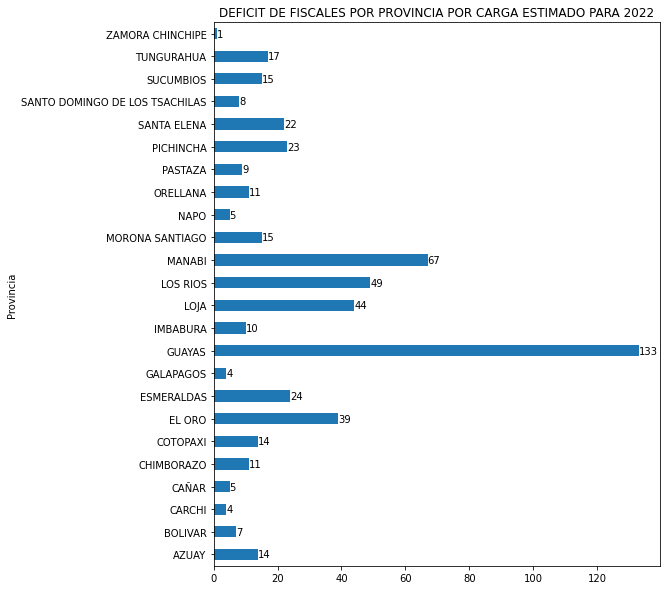

In [146]:
import matplotlib.pyplot as plt
plt.figure()
ax = deficit_provincias.groupby(['Provincia'])['Déficit x Carga'].sum().plot.barh(title='DEFICIT DE FISCALES POR PROVINCIA POR CARGA ESTIMADO PARA 2022', figsize=(8,10))
for contain in ax.containers:
    ax.bar_label(contain)
plt.savefig(os.path.join("C:\\Users\\falconiel\\PycharmProjects\\FGE_Statistics\\data\\opt_fiscales\\proyeccion2022EPN\\",
                         'provinciasDeficitXCarga2022.png'))

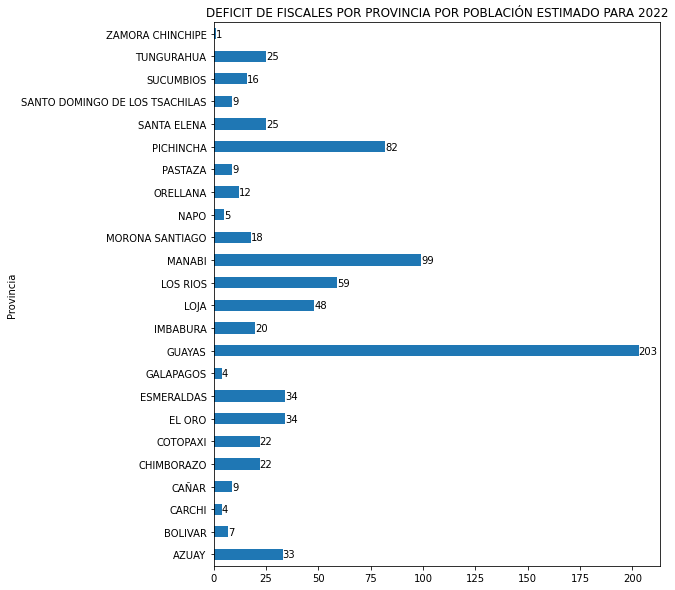

In [147]:
plt.figure()
ax = deficit_provincias.groupby(['Provincia'])['Déficit x Población'].sum().plot.barh(title='DEFICIT DE FISCALES POR PROVINCIA POR POBLACIÓN ESTIMADO PARA 2022', figsize=(8,10))
for contain in ax.containers:
    ax.bar_label(contain)
plt.savefig(os.path.join("C:\\Users\\falconiel\\PycharmProjects\\FGE_Statistics\\data\\opt_fiscales\\proyeccion2022EPN\\",
                         'provinciasDeficitXPoblacion2022.png'))

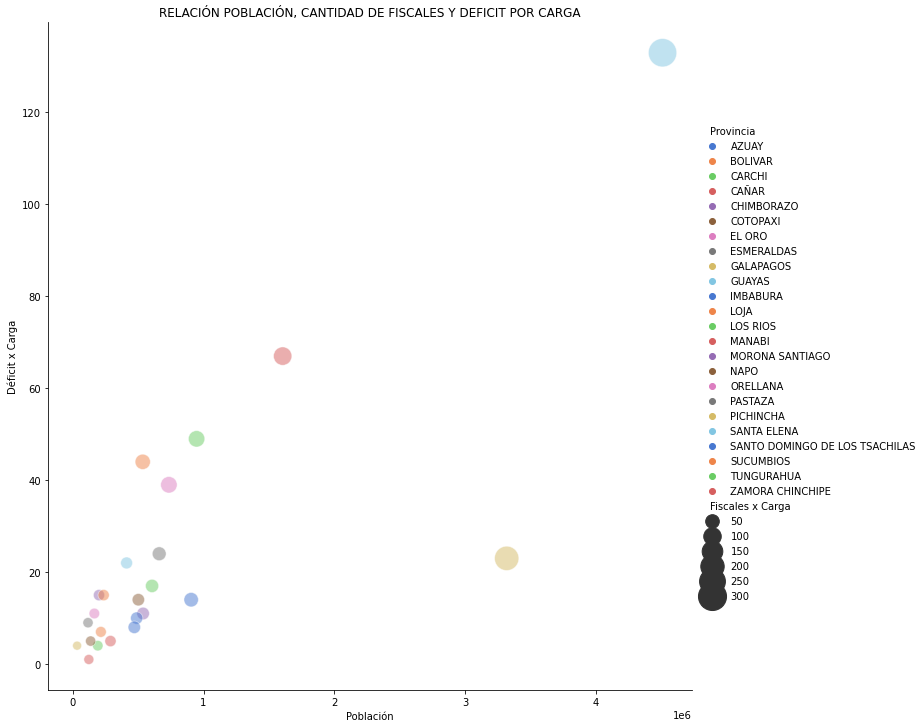

In [148]:
import seaborn as sns
sns.relplot(x='Población', y="Déficit x Carga", size='Fiscales x Carga', data=deficit_provincias, sizes=(80,800), alpha=.5, palette="muted", height=10, hue="Provincia").set(title="RELACIÓN POBLACIÓN, CANTIDAD DE FISCALES Y DEFICIT POR CARGA")
plt.savefig(os.path.join("C:\\Users\\falconiel\\PycharmProjects\\FGE_Statistics\\data\\opt_fiscales\\proyeccion2022EPN\\", 'relacionCantonesDeficit_Carga.png'))

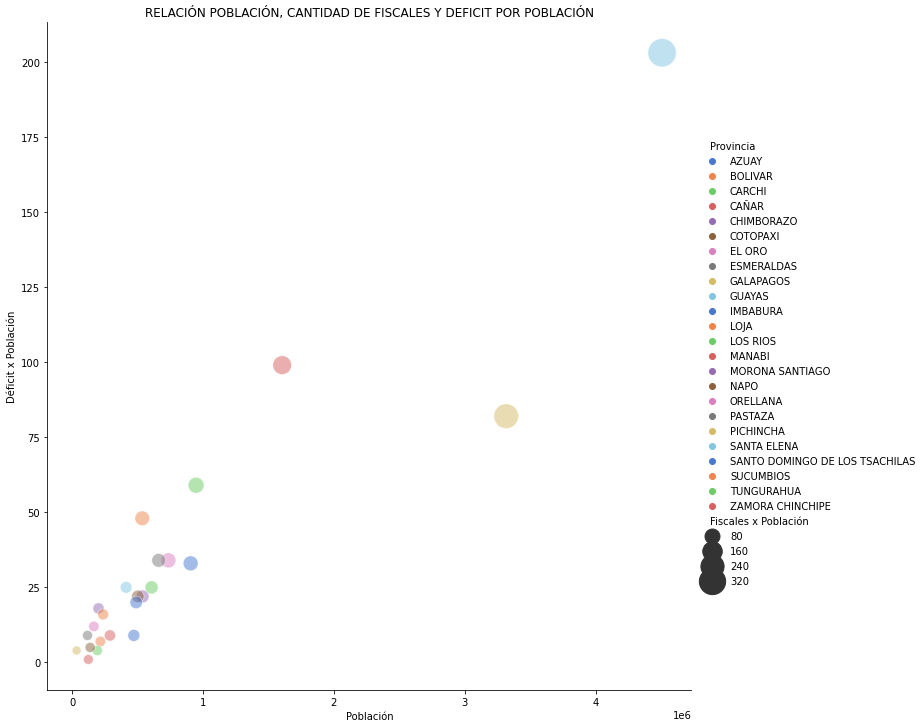

In [149]:
import seaborn as sns
sns.relplot(x='Población', y="Déficit x Población", size='Fiscales x Población', data=deficit_provincias, sizes=(80,800), alpha=.5, palette="muted", height=10, hue="Provincia").set(title="RELACIÓN POBLACIÓN, CANTIDAD DE FISCALES Y DEFICIT POR POBLACIÓN")
plt.savefig(os.path.join("C:\\Users\\falconiel\\PycharmProjects\\FGE_Statistics\\data\\opt_fiscales\\proyeccion2022EPN\\", 'relacionCantonesDeficit_Poblacion.png'))

## Asiganción de Fiscales
En esta sección del código se trata de obtener tablas con un formato adecuado para describir la asignación de fiscales

In [150]:
from tqdm import tqdm
import re
regex = r"Resultados\_([\wÁÉÍÓÚ Ñ]+).xlsx"  
asignacion_fiscales_dict = {}
for arch in tqdm(os.listdir(os.path.join(dir_root, 'Resultados/Modelo/'))):
    file_path = os.path.join(dir_root, 'Resultados/Modelo/', arch)
    provincia_name = re.findall(regex, arch, re.MULTILINE)[0]
    provincia_df = pd.read_excel(file_path, sheet_name='Fiscalias')
    provincia_df = provincia_df.transpose()
    provincia_df.columns = provincia_df.iloc[0]
    provincia_df = provincia_df[1:].reset_index()
    provincia_df.drop(columns=['Déficit x Carga', 'Faltantes x Población'], inplace=True)
    # Coloco un nombre distinto porque voy a usar el diccionario para poner codigos y generar una tabla maestra con la información y la asignación
    provincia_df.rename(columns={'index':'CANTON_NOMBRE'}, inplace=True)
    # provincia_df.index.name="ID"
    provincia_df['Provincia'] = provincia_name
    asignacion_fiscales_dict[provincia_name] = provincia_df

100%|██████████| 24/24 [00:00<00:00, 75.17it/s]


In [151]:
asignacion_fiscales_dict['LOJA']

Name,CANTON_NOMBRE,PERSONAS Y GARANTIAS,DELINCUENCIA ORGANIZADA,ADMINISTRACION PUBLICA,SOLUCIONES RAPIDAS,VIOLENCIA DE GENERO,PATRIMONIO CIUDADANO,FE PUBLICA,ACCIDENTES DE TRANSITO,MULTICOMPETENTE,Provincia
0,LOJA,3,3,2,16,6,4,2,7,0,LOJA
1,CATAMAYO,0,0,0,0,0,0,0,0,3,LOJA
2,CALVAS,0,0,0,0,0,0,0,0,3,LOJA
3,MACARA,0,0,0,0,0,0,0,0,2,LOJA
4,SARAGURO,1,1,1,1,1,1,1,1,0,LOJA
5,PALTAS,0,0,0,0,0,0,0,0,2,LOJA
6,GONZANAMA,0,0,0,0,0,0,0,0,1,LOJA
7,CELICA,0,0,0,0,0,0,0,0,2,LOJA
8,PUYANGO,0,0,0,0,0,0,0,0,2,LOJA
9,ZAPOTILLO,0,0,0,0,0,0,0,0,2,LOJA


In [152]:
asignacion_fiscales_df = pd.concat([asignacion_fiscales_dict[x] for x in asignacion_fiscales_dict.keys()])
asignacion_fiscales_df.reset_index(inplace=True)
asignacion_fiscales_df.shape

(221, 12)

In [153]:
asignacion_fiscales_df.CANTON_NOMBRE[(asignacion_fiscales_df.Provincia=="MANABI")&(asignacion_fiscales_df.CANTON_NOMBRE=="BOLIVAR")] = "BOLIVAR (CALCETA)"
asignacion_fiscales_df.CANTON_NOMBRE[(asignacion_fiscales_df.Provincia=="LOJA")&(asignacion_fiscales_df.CANTON_NOMBRE=="OLMEDO")] = "OLMEDO (LOJA)"

C:\Users\FALCON~1\AppData\Local\Temp/ipykernel_27816/3106218590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asignacion_fiscales_df.CANTON_NOMBRE[(asignacion_fiscales_df.Provincia=="MANABI")&(asignacion_fiscales_df.CANTON_NOMBRE=="BOLIVAR")] = "BOLIVAR (CALCETA)"
C:\Users\FALCON~1\AppData\Local\Temp/ipykernel_27816/3106218590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asignacion_fiscales_df.CANTON_NOMBRE[(asignacion_fiscales_df.Provincia=="LOJA")&(asignacion_fiscales_df.CANTON_NOMBRE=="OLMEDO")] = "OLMEDO (LOJA)"


In [154]:
asignacion_fiscales_df.CANTON_NOMBRE[asignacion_fiscales_df.CANTON_NOMBRE=="ONA"] = "OÑA"
asignacion_fiscales_df.CANTON_NOMBRE[asignacion_fiscales_df.CANTON_NOMBRE=="ALFREDO BAQUERIZO MORENO"] = "ALFREDO BAQUERIZO MORENO ( JUJAN )"
asignacion_fiscales_df.CANTON_NOMBRE[asignacion_fiscales_df.CANTON_NOMBRE=="ANTONIO ELIZALDE"] = "GENERAL ANTONIO ELIZALDE (BUCAY)"
asignacion_fiscales_df.CANTON_NOMBRE[asignacion_fiscales_df.CANTON_NOMBRE=="EMPALME"] = "EL EMPALME"
asignacion_fiscales_df.CANTON_NOMBRE[asignacion_fiscales_df.CANTON_NOMBRE=="MARCELINO MARIDUENA"] = "CORONEL MARCELINO MARIDUENA"
asignacion_fiscales_df.CANTON_NOMBRE[asignacion_fiscales_df.CANTON_NOMBRE=="BUENA FE"] = "SAN JACINTO DE BUENA FE"
asignacion_fiscales_df.CANTON_NOMBRE[asignacion_fiscales_df.CANTON_NOMBRE=="SANTIAGO (MENDEZ) DE PILLARO"] = "SANTIAGO DE PILLARO"

C:\Users\FALCON~1\AppData\Local\Temp/ipykernel_27816/724431745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asignacion_fiscales_df.CANTON_NOMBRE[asignacion_fiscales_df.CANTON_NOMBRE=="ONA"] = "OÑA"
C:\Users\FALCON~1\AppData\Local\Temp/ipykernel_27816/724431745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asignacion_fiscales_df.CANTON_NOMBRE[asignacion_fiscales_df.CANTON_NOMBRE=="ALFREDO BAQUERIZO MORENO"] = "ALFREDO BAQUERIZO MORENO ( JUJAN )"
C:\Users\FALCON~1\AppData\Local\Temp/ipykernel_27816/724431745.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

In [155]:
asignacion_fiscales_df['CODCANTON'] = asignacion_fiscales_df.CANTON_NOMBRE.apply(lambda x: codigos_cantones_dict[x] if x in codigos_cantones_dict.keys() else 'NO ENCUENTRO')
asignacion_fiscales_df.sample(10)


Name,index,CANTON_NOMBRE,PERSONAS Y GARANTIAS,DELINCUENCIA ORGANIZADA,ADMINISTRACION PUBLICA,SOLUCIONES RAPIDAS,VIOLENCIA DE GENERO,PATRIMONIO CIUDADANO,FE PUBLICA,ACCIDENTES DE TRANSITO,MULTICOMPETENTE,Provincia,CODCANTON
145,8,SANTA ANA,0,0,0,0,0,0,0,0,4,MANABI,1313
119,11,ESPINDOLA,0,0,0,0,0,0,0,0,0,LOJA,1106
159,0,MORONA,0,0,0,3,4,0,0,1,2,MORONA SANTIAGO,1401
47,2,LA MANA,0,0,0,0,0,0,0,0,5,COTOPAXI,0502
87,10,NARANJITO,0,0,0,0,0,0,0,0,4,GUAYAS,0912
192,0,LA LIBERTAD,1,1,0,5,2,0,0,2,1,SANTA ELENA,2402
175,4,CARLOS JULIO AROSEMENA TOLA,0,0,0,0,0,0,0,0,1,NAPO,1509
57,5,ARENILLAS,0,0,0,0,0,0,0,0,3,EL ORO,0702
9,9,CHORDELEG,0,0,0,0,0,0,0,0,2,AZUAY,0111
179,3,AGUARICO,0,0,0,0,0,0,0,0,1,ORELLANA,2202


In [156]:
asignacion_fiscales_df.CANTON_NOMBRE[asignacion_fiscales_df.CODCANTON=='NO ENCUENTRO'].tolist()

[]

In [157]:
asignacion_fiscales_df[asignacion_fiscales_df.Provincia=='LOJA']

Name,index,CANTON_NOMBRE,PERSONAS Y GARANTIAS,DELINCUENCIA ORGANIZADA,ADMINISTRACION PUBLICA,SOLUCIONES RAPIDAS,VIOLENCIA DE GENERO,PATRIMONIO CIUDADANO,FE PUBLICA,ACCIDENTES DE TRANSITO,MULTICOMPETENTE,Provincia,CODCANTON
108,0,LOJA,3,3,2,16,6,4,2,7,0,LOJA,1101
109,1,CATAMAYO,0,0,0,0,0,0,0,0,3,LOJA,1103
110,2,CALVAS,0,0,0,0,0,0,0,0,3,LOJA,1102
111,3,MACARA,0,0,0,0,0,0,0,0,2,LOJA,1108
112,4,SARAGURO,1,1,1,1,1,1,1,1,0,LOJA,1111
113,5,PALTAS,0,0,0,0,0,0,0,0,2,LOJA,1109
114,6,GONZANAMA,0,0,0,0,0,0,0,0,1,LOJA,1107
115,7,CELICA,0,0,0,0,0,0,0,0,2,LOJA,1104
116,8,PUYANGO,0,0,0,0,0,0,0,0,2,LOJA,1110
117,9,ZAPOTILLO,0,0,0,0,0,0,0,0,2,LOJA,1113


Genero un dataset que une los datos disponibles en el deficit de fiscales con la asignacion de fiscales por fiscalia especializada y multicompetente

In [158]:
asignacion_fiscales_merge = pd.merge(deficit_cantones_df, asignacion_fiscales_df, on='CODCANTON', suffixes=['_left', '_right'])
print(deficit_cantones_df.shape)
print(asignacion_fiscales_df.shape)
print(asignacion_fiscales_merge.shape)

(221, 14)
(221, 13)
(221, 26)


In [159]:
# asignacion_fiscales_merge._merge.value_counts()

In [160]:
asignacion_fiscales_merge.sample(5)

,index_left,CODCANTON,Provincia_left,Cantones,Poblacion,Delitos,Fiscales Actuales,Tasa Actual,Fiscales x Carga,Déficit x Carga,...,PERSONAS Y GARANTIAS,DELINCUENCIA ORGANIZADA,ADMINISTRACION PUBLICA,SOLUCIONES RAPIDAS,VIOLENCIA DE GENERO,PATRIMONIO CIUDADANO,FE PUBLICA,ACCIDENTES DE TRANSITO,MULTICOMPETENTE,Provincia_right
166,7,1407,MORONA SANTIAGO,HUAMBOYA,12721,277,0.0,0.000000,1,1.0,...,0,0,0,0,0,0,0,0,2,MORONA SANTIAGO
8,8,0106,AZUAY,PUCARA,10873,220,0.0,0.000000,1,1.0,...,0,0,0,0,0,0,0,0,1,AZUAY
21,6,0207,BOLIVAR,LAS NAVES,7631,255,2.0,26.208885,1,-1.0,...,0,0,0,0,0,0,0,0,1,BOLIVAR
157,20,1318,MANABI,OLMEDO,10473,207,0.0,0.000000,1,1.0,...,0,0,0,0,0,0,0,0,1,MANABI
114,6,1107,LOJA,GONZANAMA,11253,245,1.0,8.886519,1,0.0,...,0,0,0,0,0,0,0,0,1,LOJA


In [161]:
asignacion_fiscales_merge.to_excel(os.path.join(dir_root, 'asignacionFiscales.xlsx'))

In [162]:
asignacion_fiscales_merge.columns

Index(['index_left', 'CODCANTON', 'Provincia_left', 'Cantones', 'Poblacion',
       'Delitos', 'Fiscales Actuales', 'Tasa Actual', 'Fiscales x Carga',
       'Déficit x Carga', 'Tasa x Carga', 'Fiscales x Población',
       'Déficit x Población', 'Tasa x Población', 'index_right',
       'CANTON_NOMBRE', 'PERSONAS Y GARANTIAS', 'DELINCUENCIA ORGANIZADA',
       'ADMINISTRACION PUBLICA', 'SOLUCIONES RAPIDAS', 'VIOLENCIA DE GENERO',
       'PATRIMONIO CIUDADANO', 'FE  PUBLICA', 'ACCIDENTES DE TRANSITO',
       'MULTICOMPETENTE', 'Provincia_right'],
      dtype='object')

In [163]:
asignacionFiscales_out = asignacion_fiscales_merge.loc[:,['index_left', 'CODCANTON', 'Provincia_left','Cantones', 'Poblacion', 'Delitos', 'Fiscales Actuales', 'Tasa Actual', 'Fiscales x Carga', 'Déficit x Carga', 'Tasa x Carga', 'Fiscales x Población', 'Déficit x Población', 'Tasa x Población', 'PERSONAS Y GARANTIAS', 'DELINCUENCIA ORGANIZADA', 'ADMINISTRACION PUBLICA', 'SOLUCIONES RAPIDAS', 'VIOLENCIA DE GENERO', 'PATRIMONIO CIUDADANO', 'FE  PUBLICA', 'ACCIDENTES DE TRANSITO', 'MULTICOMPETENTE']]

In [164]:
asignacionFiscales_out.rename(columns={'index_left':'index',
                                       'Provincia_left':'Provincia',
                                       'Poblacion':'Población',
                                       'FE  PUBLICA':'FE PUBLICA'}, inplace=True)
asignacionFiscales_out.sample(10)

,index,CODCANTON,Provincia,Cantones,Población,Delitos,Fiscales Actuales,Tasa Actual,Fiscales x Carga,Déficit x Carga,...,Tasa x Población,PERSONAS Y GARANTIAS,DELINCUENCIA ORGANIZADA,ADMINISTRACION PUBLICA,SOLUCIONES RAPIDAS,VIOLENCIA DE GENERO,PATRIMONIO CIUDADANO,FE PUBLICA,ACCIDENTES DE TRANSITO,MULTICOMPETENTE
25,3,0403,CARCHI,ESPEJO,14195,329,1.0,7.044734,2,1.0,...,14.089468,0,0,0,0,0,0,0,0,2
217,5,1908,ZAMORA CHINCHIPE,PALANDA,10421,235,1.0,9.596008,1,0.0,...,9.596008,0,0,0,0,0,0,0,0,1
179,3,2202,ORELLANA,AGUARICO,3728,109,0.0,0.000000,1,1.0,...,26.824034,0,0,0,0,0,0,0,0,1
135,11,1213,LOS RIOS,QUINSALOMA,20987,336,1.0,4.764854,2,1.0,...,9.529709,0,0,0,0,0,0,0,0,2
213,1,1905,ZAMORA CHINCHIPE,YANTZAZA,27171,641,3.0,11.041184,3,0.0,...,11.041184,0,0,0,0,0,0,0,0,3
82,5,0911,GUAYAS,NARANJAL,97653,2581,2.0,2.048068,9,7.0,...,9.216307,0,0,0,0,0,0,0,0,9
130,6,1212,LOS RIOS,MOCACHE,44502,982,1.0,2.247090,4,3.0,...,8.988360,0,0,0,0,0,0,0,0,4
156,19,1320,MANABI,JAMA,26831,266,0.0,0.000000,1,1.0,...,11.181096,0,0,0,0,0,0,0,0,3
108,0,1101,LOJA,LOJA,281614,11899,16.0,5.681536,43,27.0,...,15.269127,3,3,2,16,6,4,2,7,0
167,8,1410,MORONA SANTIAGO,LOGRONO,7852,216,0.0,0.000000,1,1.0,...,12.735609,0,0,0,0,0,0,0,0,1


In [165]:
asignacionFiscales_out.to_excel(os.path.join("C:\\Users\\falconiel\\PycharmProjects\\FGE_Statistics\\data\\opt_fiscales\\proyeccion2022EPN\\", 'asignacionFiscalesProvinciaEPN2022M2.xlsx'))